In [15]:
!pip install hdbscan

  Using cached hdbscan-0.8.27.tar.gz (6.4 MB)


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\lukas\appdata\local\programs\python\python39\python.exe' 'c:\users\lukas\appdata\local\programs\python\python39\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\lukas\AppData\Local\Temp\tmphyickhox'
       cwd: C:\Users\lukas\AppData\Local\Temp\pip-install-_coztbg7\hdbscan_a432916ab0264733ad66aed8cfc9dd27
  Complete output (27 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-3.9\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-3.9\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-3.9\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-3.9\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-3.9\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-3.9\hdbscan

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build hdbscan



  copying hdbscan\__init__.py -> build\lib.win-amd64-3.9\hdbscan
  creating build\lib.win-amd64-3.9\hdbscan\tests
  copying hdbscan\tests\test_flat.py -> build\lib.win-amd64-3.9\hdbscan\tests
  copying hdbscan\tests\test_hdbscan.py -> build\lib.win-amd64-3.9\hdbscan\tests
  copying hdbscan\tests\test_rsl.py -> build\lib.win-amd64-3.9\hdbscan\tests
  copying hdbscan\tests\__init__.py -> build\lib.win-amd64-3.9\hdbscan\tests
  running build_ext
  skipping 'hdbscan\_hdbscan_tree.c' Cython extension (up-to-date)
  skipping 'hdbscan\_hdbscan_linkage.c' Cython extension (up-to-date)
  skipping 'hdbscan\_hdbscan_boruvka.c' Cython extension (up-to-date)
  skipping 'hdbscan\_hdbscan_reachability.c' Cython extension (up-to-date)
  skipping 'hdbscan\_prediction_utils.c' Cython extension (up-to-date)
  skipping 'hdbscan\dist_metrics.c' Cython extension (up-to-date)
  building 'hdbscan._hdbscan_tree' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Bu

In [11]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import pandas as pd
from scipy.spatial.distance import pdist, cdist
from fastdist import fastdist
import hdbscan

ModuleNotFoundError: No module named 'hdbscan'

In [2]:
pca_feats = pd.read_csv('../data/pc_95_py.csv')
feats_scaled = pd.read_csv('../data/feats_scaled.csv')
available_feats = pd.read_csv('../data/available_feats.csv')

In [5]:
feats_normed = normalize(available_feats)

In [ ]:
#Y = np.random.rand(10,100)
pwd = fastdist.matrix_pairwise_distance(feats_scaled.values, fastdist.euclidean, 'euclidean')

c:\users\lukas\appdata\local\programs\python\python39\lib\site-packages\fastdist\fastdist.py:975: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  return cosine_pairwise_distance(a, return_matrix)


In [8]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(feats_normed)
distances, indices = nbrs.kneighbors(feats_normed)

### Plotting the distances
The optimal value for epsilon will be found at the point of maximum curvature.

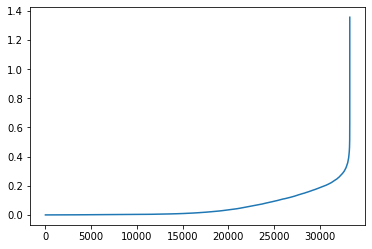

In [9]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#dist_trans = np.log(distances)

#plt.plot(dist_trans)

In [23]:
dist_trans = np.log(distances)

<ipython-input-23-ed48cb86c666>:1: RuntimeWarning: divide by zero encountered in log
  dist_trans = np.log(distances)


(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 33265.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.]),
 array([-0.5 , -0.46, -0.42, -0.38, -0.34, -0.3 , -0.26, -0.22, -0.18,
        -0.14, -0.1 , -0.06, -0.02,  0.02,  0.06,  0.1 ,  0.14,  0.18,
         0.22,  0.26,  0.3 ,  0.34,  0.38,  0.42,  0.46,  0.5 ]),
 <BarContainer object of 25 artists>)

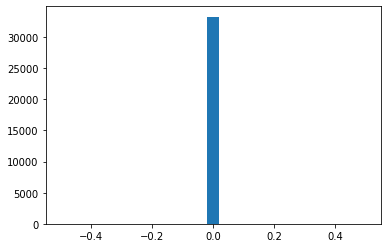

In [10]:
m = DBSCAN(eps=1.2, min_samples=120)
m.fit(pca_feats)
clusters = m.labels_
plt.hist(clusters, bins = 25)

In [12]:
clusters

array([ 0, -1, -1, ..., -1, -1, -1], dtype=int64)

In [50]:
clusters = m.labels_

In [51]:
set(clusters)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158}

(array([    0.,     0.,     0.,     0.,     0., 33265.,     0.,     0.,
            0.,     0.]),
 array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5]),
 <BarContainer object of 10 artists>)

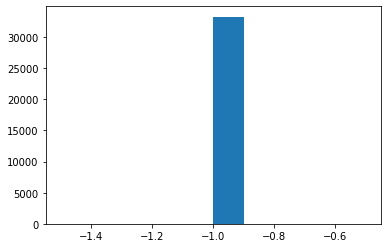

In [58]:
plt.hist(clusters)